In [2]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [3]:
fashion_mnist= tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

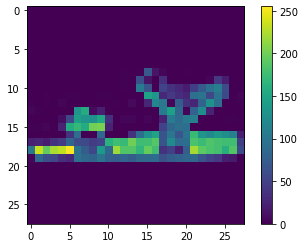

In [12]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[60000-1])
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
train_images = train_images/255.0

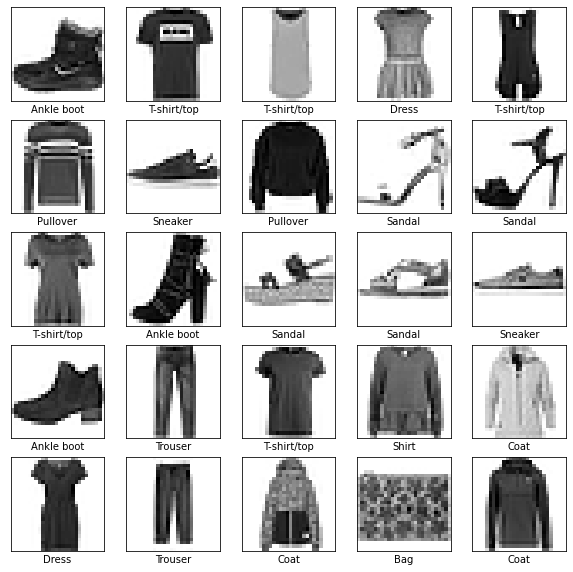

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

In [25]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [26]:
model.fit(train_images,train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 4ms/step - loss: 3.7088 - accuracy: 0.6770
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7826 - accuracy: 0.7087
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6952 - accuracy: 0.7211
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6334 - accuracy: 0.7571
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5933 - accuracy: 0.7829
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5740 - accuracy: 0.7898
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5612 - accuracy: 0.7940
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5570 - accuracy: 0.7952
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5432 - accuracy: 0.8011
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 

In [27]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose = 2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.5978 - accuracy: 0.7820 - 1s/epoch - 5ms/step

Test accuracy: 0.7820000052452087


In [28]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [29]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [30]:
predictions[0]

array([5.1100443e-13, 1.7367660e-09, 0.0000000e+00, 1.1461360e-09,
       0.0000000e+00, 3.7477985e-02, 3.1552073e-15, 6.4914189e-02,
       1.1124809e-08, 8.9760780e-01], dtype=float32)

In [32]:
import numpy as np
np.argmax(predictions[0])

9

In [33]:
test_labels[0]

9

In [34]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

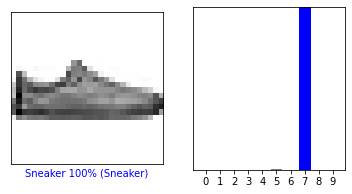

In [36]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

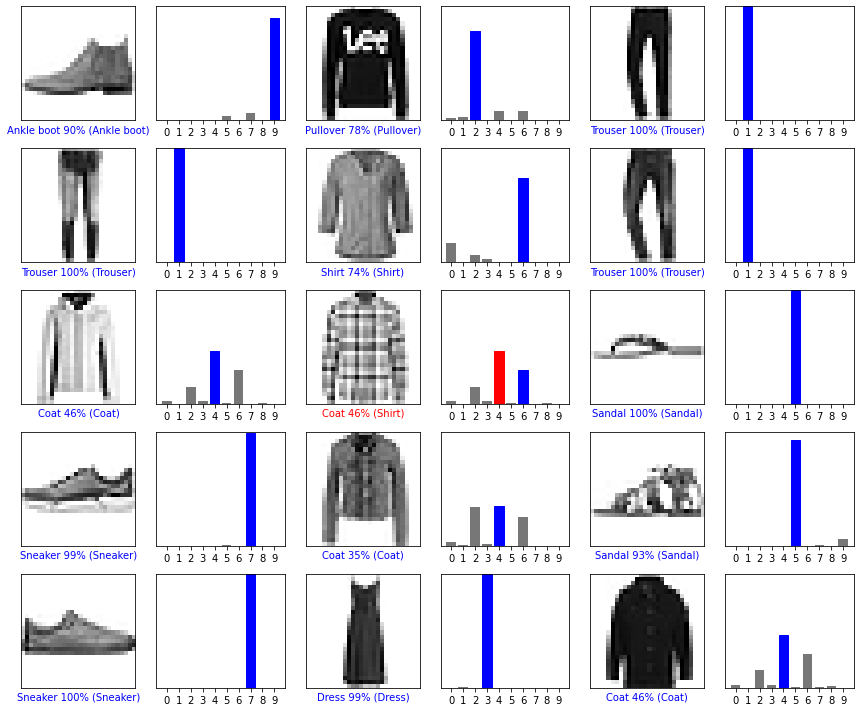

In [37]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 291ms/step
[[1.9605769e-02 2.6294781e-02 7.8201038e-01 3.9011945e-03 8.6041324e-02
  3.4941993e-05 8.2106456e-02 9.1893105e-15 5.2357759e-06 8.2250357e-10]]


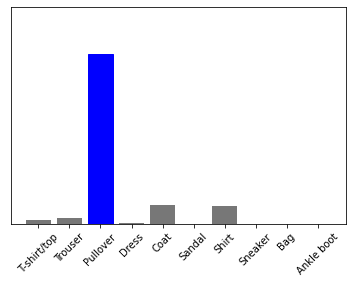

In [39]:
img = test_images[1]
print(img.shape)
img = (np.expand_dims(img,0))
print(img.shape)
predictions_single = probability_model.predict(img)
print(predictions_single)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()